# importing libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")


# imporing data

In [3]:
df1= pd.read_csv('/kaggle/input/credit-risk12/case_study1.xlsx - case_study1.csv')
df2= pd.read_csv('/kaggle/input/credit-risk12/case_study2.xlsx - case_study2.csv')

# data exploration

In [3]:
df1.head(3)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.2,0.8,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.0,0.0,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.0,0.0,...,0,6,1,0,0,2,6,0,47,2


In [4]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [7]:
#null values in df1
for i in df1.columns:
    print(i,'---->',df1.loc[df1[i]==-99999].shape[0])

PROSPECTID ----> 0
Total_TL ----> 0
Tot_Closed_TL ----> 0
Tot_Active_TL ----> 0
Total_TL_opened_L6M ----> 0
Tot_TL_closed_L6M ----> 0
pct_tl_open_L6M ----> 0
pct_tl_closed_L6M ----> 0
pct_active_tl ----> 0
pct_closed_tl ----> 0
Total_TL_opened_L12M ----> 0
Tot_TL_closed_L12M ----> 0
pct_tl_open_L12M ----> 0
pct_tl_closed_L12M ----> 0
Tot_Missed_Pmnt ----> 0
Auto_TL ----> 0
CC_TL ----> 0
Consumer_TL ----> 0
Gold_TL ----> 0
Home_TL ----> 0
PL_TL ----> 0
Secured_TL ----> 0
Unsecured_TL ----> 0
Other_TL ----> 0
Age_Oldest_TL ----> 40
Age_Newest_TL ----> 40


# dropping null values from df1

In [8]:
df1.loc[(df1['Age_Oldest_TL']==-99999) | (df1['Age_Newest_TL']==-99999)].shape

# in both column same value is missing and also most of value is zero 

(40, 26)

In [4]:
#Rows with missing values in the Age_Oldest_TL column also have missing values in the Age_Newest_TL column(basically same values)
df1.loc[df1['Age_Oldest_TL']==-99999]

df1=df1.loc[df1['Age_Newest_TL']!=-99999]

In [5]:
df1.shape

# earliar it was 51336

(51296, 26)

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#null percentage in df2
((df2 == -99999).sum() * 100 / len(df2)).sort_values(ascending=False).reset_index().style.background_gradient(cmap='RdYlGn_r')

,index,0
0,CC_utilization,92.792582
1,PL_utilization,86.557192
2,max_delinquency_level,70.026882
3,time_since_first_deliquency,70.026882
4,time_since_recent_deliquency,70.026882
5,max_unsec_exposure_inPct,45.149603
6,max_deliq_6mts,25.109085
7,max_deliq_12mts,21.100203
8,tot_enq,12.312997
9,time_since_recent_enq,12.312997


In [6]:
col_with_miss = []
for i in df2.columns:
    if (df2[i] == -99999).any():  # Check if -99999 exists in the column
        col_with_miss.append(i)

col_with_miss

['time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [7]:
column_to_drop=[]
for i in df2.columns:
    if((df2.loc[df2[i]==-99999].shape[0]*100)/df2.shape[0]>20):
        column_to_drop.append(i)
column_to_drop


['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [8]:
for i in col_with_miss:
    if i not in column_to_drop:
        print(i, '--->',df2[i].nunique())   ## just checking no of unique values missing values in col 
# with <20 % of the missing value

time_since_recent_payment ---> 2435
tot_enq ---> 85
CC_enq ---> 38
CC_enq_L6m ---> 17
CC_enq_L12m ---> 22
PL_enq ---> 42
PL_enq_L6m ---> 30
PL_enq_L12m ---> 37
time_since_recent_enq ---> 2382
enq_L12m ---> 66
enq_L6m ---> 55
enq_L3m ---> 38
pct_currentBal_all_TL ---> 1529


**analyzing columns for should we drop row or can we fill rows**

<Axes: xlabel='CC_enq_L6m', ylabel='Count'>

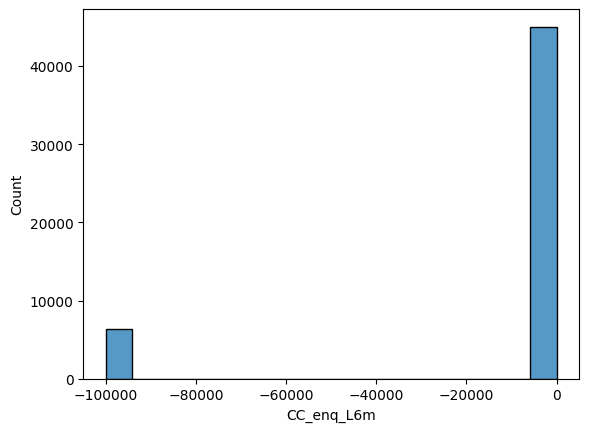

In [8]:
sns.histplot(df2['CC_enq_L6m'])

In [16]:
df2['CC_enq_L6m'].value_counts()

CC_enq_L6m
 0        41080
-99999     6321
 1         2389
 2          811
 3          337
 4          187
 5           75
 6           58
 7           38
 8           13
 9           10
 11           5
 10           4
 12           4
 13           2
 17           1
 14           1
Name: count, dtype: int64

# dropping columns

In [10]:
for i in column_to_drop:
    df2.drop(i,axis=1,inplace=True)

# dropping null values

In [11]:
for i in df2.columns:
    df2=df2.loc[df2[i] !=-99999]


In [12]:
df2.shape   


(42066, 54)

**we have loosed approx 9000 rows but we still have 42000 data so it is good to go**

# merge both datase

In [13]:
for i in df1.columns:
    for j in df2.columns:
        if i==j:
            print(i)


PROSPECTID


In [14]:

df= pd.merge(df1,df2,how='inner',on=['PROSPECTID'])  #common chize hi aayenge
df.head(3)

df.shape

(42064, 79)

will check by filling as well and see which perform better

In [15]:
cat_col=[]
for i in df.columns:
    if(df[i].dtype == 'object'):
        cat_col.append(i);

In [17]:
cat_col

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

# chi square test

In [18]:
for i in cat_col:
    chi2 , pval,_,_= chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i,'--->',pval)

# p value of all categorical feature is less than 0.05, we will accept all feature

MARITALSTATUS ---> 3.578180861038862e-233
EDUCATION ---> 2.6942265249737532e-30
GENDER ---> 1.907936100186563e-05
last_prod_enq2 ---> 0.0
first_prod_enq2 ---> 7.84997610555419e-287
Approved_Flag ---> 0.0


In [19]:
#numerical columns
num_col= []
for i in df.columns:
    if df[i].dtype != 'object':
        num_col.append(i)
num_col=num_col[1:]
print(len(num_col))
print(num_col,end=',')

72
['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'p

# Variance Inflation Factor

In [20]:
vif_data= df[num_col]
total_column= vif_data.shape[1]
column_index=0
column_to_be_kept=[]

for i in range(total_column):
    vif_val= variance_inflation_factor(vif_data,column_index)
    print(num_col[column_index],'--->',vif_val)

    if vif_val < 6:
        column_to_be_kept.append(num_col[i])
        column_index=column_index+1
    else:
        vif_data= vif_data.drop(columns=num_col[i])



Total_TL ---> inf
Total_TL ---> inf
Total_TL ---> 11.320180023967996
Total_TL ---> 8.363698035000327
Total_TL ---> 6.520647877790928
Total_TL ---> 5.149501618212625
Tot_Closed_TL ---> 2.611111040579735
Tot_Active_TL ---> inf
Tot_Active_TL ---> 1788.7926256209232
Tot_Active_TL ---> 8.601028256477228
Tot_Active_TL ---> 3.8328007921530785
Total_TL_opened_L6M ---> 6.099653381646727
Total_TL_opened_L6M ---> 5.581352009642762
Tot_TL_closed_L6M ---> 1.985584353098778
pct_tl_open_L6M ---> inf
pct_tl_open_L6M ---> 4.809538302819343
pct_tl_closed_L6M ---> 23.270628983464636
pct_tl_closed_L6M ---> 30.595522588100053
pct_tl_closed_L6M ---> 4.3843464059655854
pct_active_tl ---> 3.0646584155234238
pct_closed_tl ---> 2.898639771299251
Total_TL_opened_L12M ---> 4.377876915347324
Tot_TL_closed_L12M ---> 2.2078535836958433
pct_tl_open_L12M ---> 4.916914200506864
pct_tl_closed_L12M ---> 5.214702030064725
Tot_Missed_Pmnt ---> 3.3861625024231476
Auto_TL ---> 7.840583309478997
Auto_TL ---> 5.255034641721438

In [21]:
print(column_to_be_kept,end=', ')

['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'num_lss_12mts', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag'], 

In [22]:
len(column_to_be_kept)
#After checking the VIF values, only 39 columns have a VIF greater than 6
#column_to_be_kept
     

39

# anova

In [23]:

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in column_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [24]:
print(len(columns_to_be_kept_numerical))

37


# feature engineering

In [25]:

cat_col

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [26]:
for i in cat_col:
    print(i,'---->',df[i].unique())

MARITALSTATUS ----> ['Married' 'Single']
EDUCATION ----> ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
GENDER ----> ['M' 'F']
last_prod_enq2 ----> ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
first_prod_enq2 ----> ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']
Approved_Flag ----> ['P2' 'P1' 'P3' 'P4']


# Preparing a new DataFrame after completing all statistical tests

In [30]:

features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

# Performing ordinal encoding on the EDUCATION column

In [31]:

df['EDUCATION']=df['EDUCATION'].replace({
    'SSC': 1,
    '12TH':2,
    'GRADUATE':3,
    'UNDER GRADUATE':3,
    'POST-GRADUATE':4,
    'OTHERS':1,
    'PROFESSIONAL':4

})

# Performing one-hot encoding and dropping the first category to avoid the dummy variable trap


In [32]:
df_encoded=pd.get_dummies(df,columns=['MARITALSTATUS','GENDER','last_prod_enq2','first_prod_enq2'],drop_first=True,dtype='int')
df_encoded

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,0,0,0,1,0,0,0,0,1,0
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,0,1,0,0,0,0,0,0,0,1
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,0,1,0,0,0,0,1,0,0,0
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,0,0,0,0,1,0,0,0,0,1
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,1
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,1


# train test split

In [33]:
x= df_encoded.drop(columns='Approved_Flag')
y=df_encoded['Approved_Flag']

In [73]:
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.1,random_state=42)

# standard scaling

In [35]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [36]:
x_test

array([[ 1.7530632 , -0.46324403, -0.53344443, ..., -0.17831478,
        -0.34320219,  1.0160269 ],
       [-0.64267715, -0.46324403, -0.53344443, ..., -0.17831478,
         2.91373432, -0.98422591],
       [-0.64267715, -0.46324403, -0.53344443, ..., -0.17831478,
        -0.34320219, -0.98422591],
       ...,
       [ 0.2552765 ,  0.71833004,  0.11009678, ..., -0.17831478,
        -0.34320219,  1.0160269 ],
       [-0.64267715,  1.11061264,  0.11009678, ..., -0.17831478,
        -0.34320219,  1.0160269 ],
       [ 0.07568577,  0.48201523,  0.75363798, ..., -0.17831478,
        -0.34320219, -0.98422591]])

# Model building and evaluation


In [41]:

rf= RandomForestClassifier(n_estimators=250,max_features=15,min_samples_leaf=15,oob_score= True)
rf.fit(x_train_pca,y_train)
y_pred=rf.predict(x_test_pca)
accuracy=accuracy_score(y_test, y_pred)
print(rf.oob_score_)
accuracy

0.7269620516477965


0.7209081183882087

In [74]:
rf= RandomForestClassifier(n_estimators=250,max_features=15,min_samples_leaf=15,oob_score=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(rf.oob_score_)
accuracy


0.7763161370420266


0.7706203945804612

In [136]:
rf.oob_score_

0.7764405218269887

**without ss accuracy is 0.7661951741352668 after ss accuracy is 0.7659574468085106 so not any significant improvement**

In [26]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Class p1:
Precision: 0.8393063583815029
Recall: 0.7159763313609467
F1 Score: 0.7727514635444386

Class p2:
Precision: 0.7988054607508532
Recall: 0.9278493557978196
F1 Score: 0.8585052728106373

Class p3:
Precision: 0.441400304414003
Recall: 0.2188679245283019
F1 Score: 0.2926337033299697

Class p4:
Precision: 0.7264791464597479
Recall: 0.7278911564625851
F1 Score: 0.7271844660194176



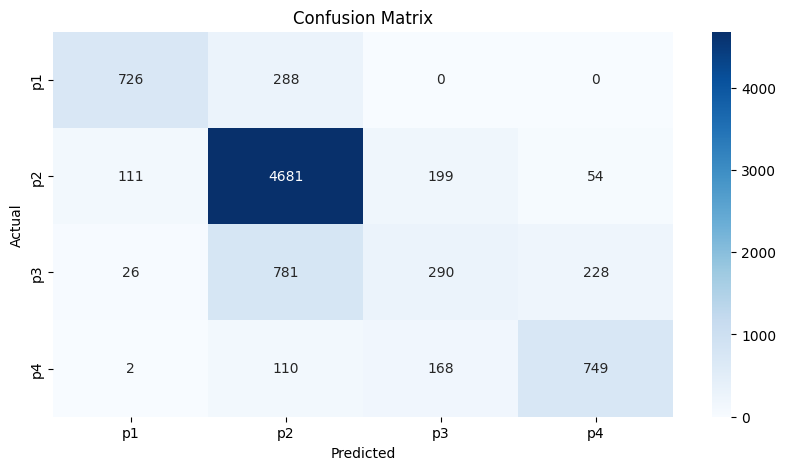

In [42]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 5))
labels=['p1','p2','p3','p4']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# descriptrion

1. model is able to predict p1 p2 p4 descently but not able to deffrentiate for p3

In [89]:
#from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical

#le = LabelEncoder()
#y_train = le.fit_transform(y_train)
#y_test = le.transform(y_test)  # For multi-class classification
#y_train = to_categorical(y_train)
#y_test=to_categorical(y_test)

In [107]:
#from tensorflow.keras.regularizers import l1
#from sklearn.decomposition import PCA

In [112]:
#model = Sequential()
#model.add(Dense(64, input_dim=30, activation='selu',kernel_regularizer=l2(0.02)))
#model.add(Dense(32, activation='selu'))
#model.add(Dense(32, activation='relu'))


#model.add(Dense(4, activation='softmax')) 


In [29]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#history = model.fit(x_train_pca, y_train, epochs=20, batch_size=32, validation_data=(x_test_pca,y_test))


# apply pca

In [77]:
pca = PCA(n_components=25)  # Retain 95% of the variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print(x_train_pca.shape[1])


25


In [86]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)


In [49]:
from xgboost import XGBClassifier

In [54]:
x_train_pca.shape

(33651, 38)

In [55]:
x_test_pca.shape

(8413, 38)

# Xgboost

In [87]:
xgb = XGBClassifier(n_estimators=250,objective='multi:softmax',  num_class=4)
xgb.fit(x_train_pca,y_train)
yp1=xgb.predict(x_test_pca)
accuracy_score(y_test,yp1)

0.7649156168290944

In [91]:
xgb = XGBClassifier(n_estimators=150,objective='multi:softmax',  num_class=4)
xgb.fit(x_train,y_train)
yp1=xgb.predict(x_test)
accuracy_score(y_test,yp1)

0.7782267649156168

# Feature selection using XGBoost and retraining the model


In [92]:
from sklearn.feature_selection import SelectFromModel
model = XGBClassifier()
model.fit(x_train, y_train)
selection = SelectFromModel(model, threshold="median", prefit=True)
x_train_sel = selection.transform(x_train)
x_test_sel = selection.transform(x_test)


In [93]:
x_train_sel.shape

(37857, 25)

In [96]:
xgb = XGBClassifier(n_estimators=100,objective='multi:softmax',  num_class=4)
xgb.fit(x_train_sel,y_train)
yp1=xgb.predict(x_test_sel)
accuracy_score(y_test,yp1)

0.780603755645353

In [100]:
from sklearn.metrics import precision_recall_fscore_support

In [101]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, yp1)
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Class p1:
Precision: 0.803347280334728
Recall: 0.7852760736196319
F1 Score: 0.7942088934850052

Class p2:
Precision: 0.8311127115592366
Recall: 0.9100946372239748
F1 Score: 0.8688123470732166

Class p3:
Precision: 0.47544642857142855
Recall: 0.3193403298350825
F1 Score: 0.38206278026905827

Class p4:
Precision: 0.751984126984127
Recall: 0.7359223300970874
F1 Score: 0.7438665358194307



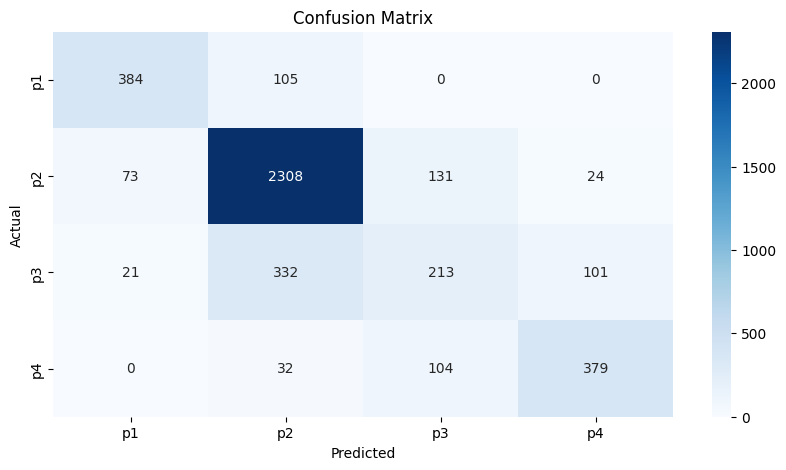

In [103]:
cm=confusion_matrix(y_test,yp1)
plt.figure(figsize=(10, 5))
labels=['p1','p2','p3','p4']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# description:
1. Our model shows no extreme flips: it never predicts p4 for an actual p1, and never predicts p1 for an actual p4. 
   Errors for p1 are low, and there are no p3→p1 mistakes. This means we can confidently approve p1 class customers. 
   By slightly increasing the probability threshold for p1 and blocking cases where p3 probability is non-trivial, 
   we can make p1 approvals even safer.

2. p2 is over-predicted: it correctly catches most real p2 cases, but it also pulls in a lot of p3 and some p4 cases. 
   If p2 customers are in an “approve” tier, this can introduce risk. We should either raise the threshold for p2 or 
   send borderline p2 predictions for manual review.

3. p3 is under-predicted: many true p3 customers are misclassified as p2 or p4. This means riskier profiles can slip 
   through if we approve based on p2. Improving p3 detection with better features or class weighting could reduce this risk.

4. p4 is reasonably accurate and never confused with p1, but some true p4 cases appear as p2/p3. For high-risk tiers 
   like p4, we can decline automatically when confidence is high.


In [115]:
yp1=xgb.predict(x_test_sel)
accuracy_score(y_test,yp1)

0.7290230568100784

In [105]:
df['Approved_Flag'].value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

In [106]:
y_train

array([1, 1, 1, ..., 2, 2, 0])

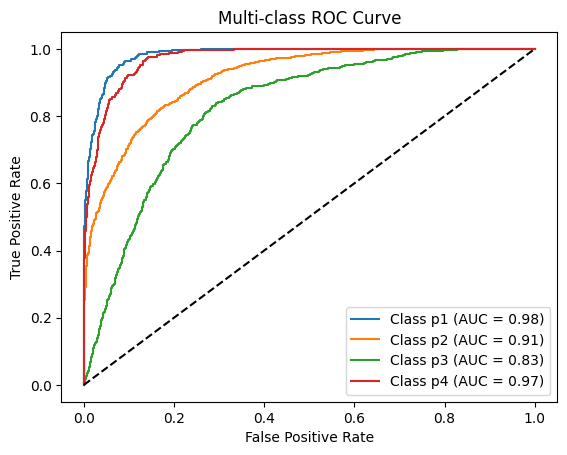

In [109]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_proba = model.predict_proba(x_test)

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class p{i+1} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend()
plt.show()


In [ ]:

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)



In [ ]:
print("best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)